## BMIS-2542: Data Programming Essentials with Python
##### Katz Graduate School of Business


## Session-5: Regression Practice Exercise

Please fill the **empty code chunks** in this file and submit the same file.

#### Boston Housing Data:

This exercise is based on the `boston.csv` data file available on Canvas.The Boston housing data set provides records of 13 attributes of housing markets around Boston, as well as the median price. </br>
**Complete the given questions as much as you can and upload your notebook to Canvas, at the end of the class**.

<u>Data Set Characteristics</u>:  

Number of Instances: 506 <br>
Number of Attributes: 13 numeric/categorical predictive<br>
Attribute Information (in order):
 * CRIM:     per capita crime rate by town
 * ZN:       proportion of residential land zoned for lots over 25,000 sq.ft.
 * INDUS:    proportion of non-retail business acres per town
 * CHAS:     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 * NOX:      nitric oxides concentration (parts per 10 million)
 * RM:       average number of rooms per dwelling
 * AGE:      proportion of owner-occupied units built prior to 1940
 * DIS:      weighted distances to five Boston employment centres
 * RAD:      index of accessibility to radial highways
 * TAX:      full-value property-tax rate per ten thousand dollars
 * PTRATIO:  pupil-teacher ratio by town
 * LSTAT:    % lower status of the population
 * MEDV:     Median value of owner-occupied homes in 1000's
 * Missing Attribute Values: None


In [1]:
# import modules
import pandas as pd
import numpy as np

import statsmodels.api as sm


import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")

import sklearn.linear_model as sklm
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Q1. Load the dataset "BostonHousing.csv".

In [3]:
boston_housing = pd.read_csv("../Data/AllDataset/BostonHousing.csv")

boston_housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


#### NOTE:

<mark>In creating predictive models, split the data into training (60%), validation(20%), and test (20%) sets. For a given model, you will do the training on the training set and evaluate its performance on the validation set.</mark>
> Hint: To split the data into three pieces (60% training, 20% validation, 20% test), first split the data into two pieces (60/40). Then, take the 40% piece of the data and split it further in two pieces (50/50).

The we will fit a multiple linear regression model to the median house price (MEDV) as a function of CRIM, CHAS, and RM.

Q2. Select variable 'CRIM', 'CHAS', 'RM' from the dataset and name it as X. Similarly, select 'MEDV' and name it as Y.

In [4]:
X = boston_housing[['CRIM', 'CHAS', 'RM']]
Y = boston_housing['MEDV']

X.head(), Y.head()

(      CRIM  CHAS     RM
 0  0.00632     0  6.575
 1  0.02731     0  6.421
 2  0.02729     0  7.185
 3  0.03237     0  6.998
 4  0.06905     0  7.147,
 0    24.0
 1    21.6
 2    34.7
 3    33.4
 4    36.2
 Name: MEDV, dtype: float64)

Q3. Split the data into training (60%), validation(20%), and test (20%) sets.

In [14]:
X_temp, X_test, Y_temp, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train, X_val, Y_train, Y_val = train_test_split(X_temp, Y_temp, test_size=0.25, random_state=42)

print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)
print(X_test.shape,Y_test.shape)

(303, 3) (303,)
(101, 3) (101,)
(102, 3) (102,)


Q4. Fit a regresssion model.
> Hint: Add constant in X using add_constant(X) and then Use sm.OLS().

In [7]:
X_train_const = sm.add_constant(X_train)

# Fitting the regression model
model = sm.OLS(Y_train, X_train_const)
results = model.fit()

results.params

const   -31.132416
CRIM     -0.251042
CHAS      3.930766
RM        8.631823
dtype: float64

Q5. Show the regression summary (coefficients etc).
> Hint: Use result.summary()

In [8]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     139.7
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           1.42e-56
Time:                        15:34:10   Log-Likelihood:                -978.38
No. Observations:                 303   AIC:                             1965.
Df Residuals:                     299   BIC:                             1980.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -31.1324      3.171     -9.819      0.000     -37.372     -24.893
CRIM          -0.2510      0.041     -6.079      0.000      -0.332      -0.170
CHAS           3.9308      1.344      2.924      0.004       1.286       6.576
RM             8.6318      0.496     17.411      0.000       7.656       9.607
==============================================================================
Omnibus:                       41.339   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.669
Skew:                           0.513   Prob(JB):                     3.16e-33
Kurtosis:                       6.287   Cond. No.                         89.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Q6. Predict on the training data variables.
> Hint: Use results.predict(X_train)

In [9]:
Y_train_pred = results.predict(X_train_const)

Y_train_pred.head()

374    -0.057762
175    25.354770
455    23.997185
284    30.047673
493    18.085892
dtype: float64

Q7. Calculate RMSE on the training data.
> Hint Use sm.tools.eval_measures.rmse()

In [10]:
train_rmse = sm.tools.eval_measures.rmse(Y_train, Y_train_pred)

train_rmse

6.1107446912949115

Q8. Predict on the validation data.

In [11]:
X_val_const = sm.add_constant(X_val)

Y_val_pred = results.predict(X_val_const)

Y_val_pred.head()

37     19.343632
107    21.721836
130    24.526530
432    22.709320
404     6.184613
dtype: float64

Q9. Calculate RMSE on validation data

In [12]:
val_rmse = sm.tools.eval_measures.rmse(Y_val, Y_val_pred)

val_rmse

5.964296333344501

Q10. Compute the correlation table for the numerical predictors and visualize as a heatmap.

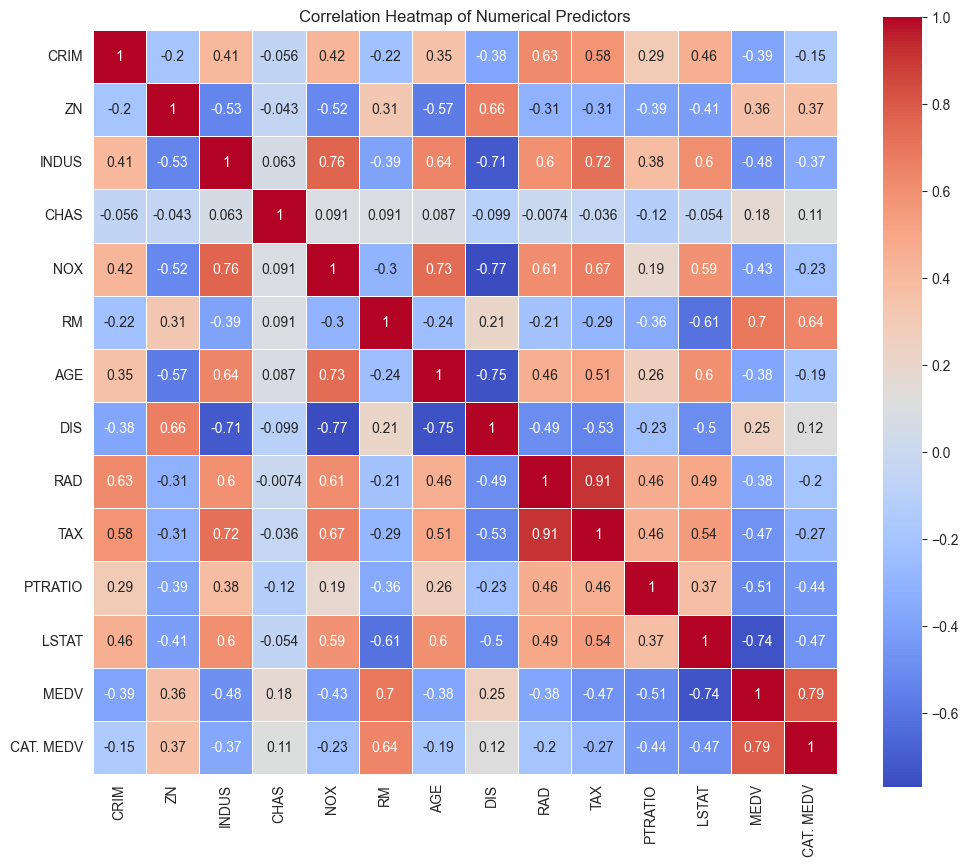

In [21]:
correlation_matrix = boston_housing.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, square=True,annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Predictors")
plt.show()

Q11. Change the above heatmap to show only the correlation with absolute value > 0.6.
> Hint use corrmat[abs(corrmat)>0.6] in heatmap

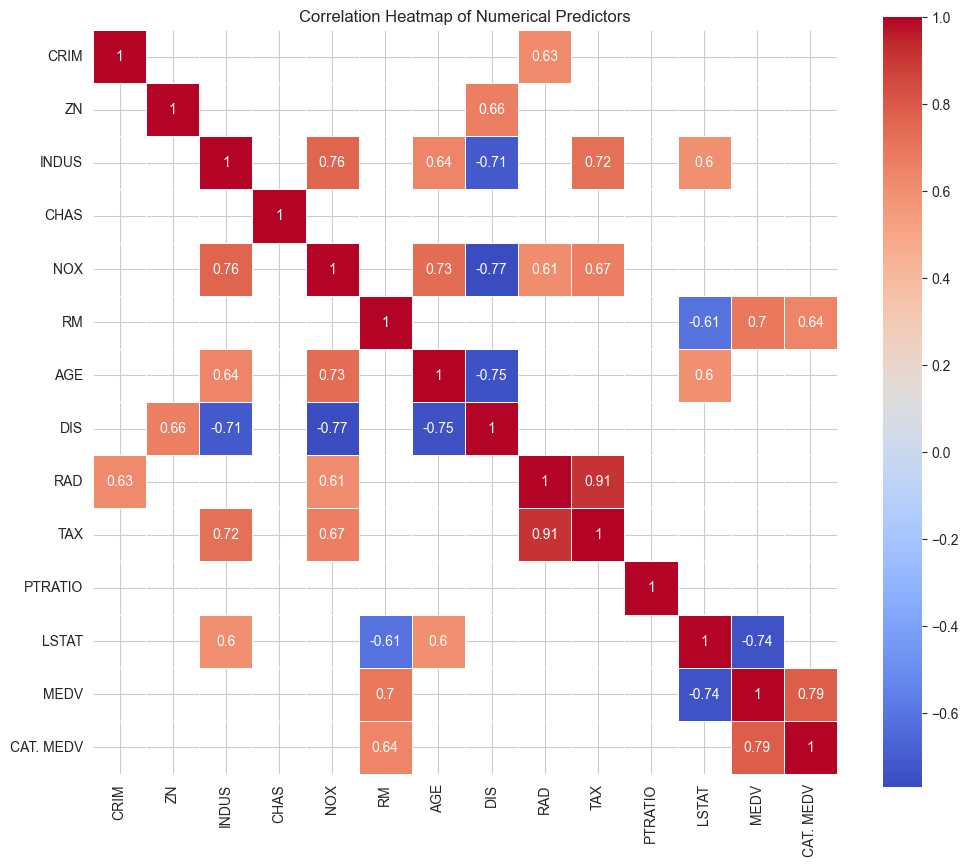

In [23]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[abs(correlation_matrix)>0.6], square=True, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Predictors")
plt.show()